In [34]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib nbagg
from scipy import signal
import mpl_toolkits.mplot3d.art3d as art3d
from astropy.stats import sigma_clip
import traceback
from datetime import *
import warnings
warnings.filterwarnings('ignore')
from scipy.fft import *

Populating the interactive namespace from numpy and matplotlib


In [35]:
"""
Test Data Processing
"""
def returnData(url):
    data_01 = pd.read_csv(url)
    data_01.columns = range(data_01.shape[1])
    #print(data_01)
    #print(data_01.columns.difference([0,1]))
    data_01=data_01.drop(data_01.columns.difference([0,1]),axis=1)
    data_01.columns = ["Time","d0"]
    #print(startT)
    #print(data_01)
    xfull,yfull = data_01.iloc[:,0].values/1E6, data_01.iloc[:,1].values
    return (xfull,yfull)


def three_sigmad(nt,nv,chunks,numSigma):
    data = np.row_stack((nt,nv))
    out = np.copy(data)
    i=0
    size=round(data.shape[1]/chunks)
    deleted=0
    while i < chunks:
        chunk = data[:, i*size:(i+1)*size]
        #print(chunk.shape)
        lower_bound = chunk[1,:].mean() - numSigma * np.std(chunk[1,:],ddof=1)
        upper_bound = chunk[1,:].mean() + numSigma * np.std(chunk[1,:],ddof=1)
        for x in range(chunk.shape[1]):
            if chunk[1,x] >= upper_bound or chunk[1,x] <= lower_bound:
                #print("True")
                out=np.delete(out,x+i*size-deleted,axis=1)
                deleted+=1

        i+=1
    print(deleted)
    return out[0,:],out[1,:]

def genthePlots(data,start,end,fs,fs2,chunks,numSigma,no1,no2):
    x,y=data[0],data[1]
    
    tchunk1=x[start:end]
    vchunk1=y[start:end] #OFF
    print(tchunk1.shape)
    print(vchunk1.shape)
    
    normv=(vchunk1-vchunk1.min())/(vchunk1.max()-vchunk1.min())
    z=np.polyfit(tchunk1,normv,deg=2)
    p=np.poly1d(z)
    xp=np.linspace(min(tchunk1),max(tchunk1),len(tchunk1))
    yp=p(xp)
    div=vchunk1/yp
    plt.plot(tchunk1,normv)
    plt.plot(xp,yp)
    plt.show()
    plt.plot(xp,div)
    plt.show()
    print(p)
    
    
        
    newt, newv=three_sigmad(xp,div,chunks,numSigma)
    plot(newt,newv)
    plt.show()
    unnormv=newv*p(newt)
    plt.plot(newt,unnormv)
    plt.show
    
    fclip, tclip, Sxxclip = signal.spectrogram(unnormv, fs,nperseg=no1)
    fclip2, tclip2, Sxxclip2 = signal.spectrogram(unnormv, fs2,nperseg=no2)
    #print(Sxxclip)
    
    fig, axs = plt.subplots(2, 1,figsize=(12,10))
    s_22 = axs[0].pcolormesh(tclip, fclip, Sxxclip,cmap='binary',vmin=min(Sxxclip[0]),vmax=max(Sxxclip[0]))
    axs[0].set_ylim(0,100)
    #axs[0].set_xticklabels([round(max(tchunk1)/6)*i + round(min(tchunk1)) for i in range(6)])
    axs[0].set_ylabel('Frequency [Hz]')
    axs[0].set_xlabel('Time [s]')

    s_22 = axs[1].pcolormesh(tclip2, fclip2, Sxxclip2,cmap='binary',vmin=min(Sxxclip2[0]),vmax=max(Sxxclip2[0]))
    axs[1].set_ylim(0,10)
    #axs[1].set_xticklabels([round(max(tchunk1)/6)*i + round(min(tchunk1)) for i in range(6)])
    axs[1].set_ylabel('Frequency [Hz]')
    axs[1].set_xlabel('Time [s]')

(5423,)
(5423,)


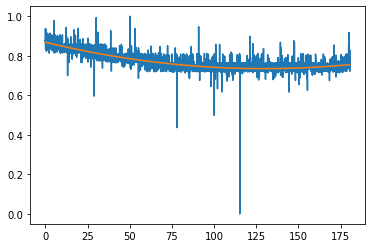

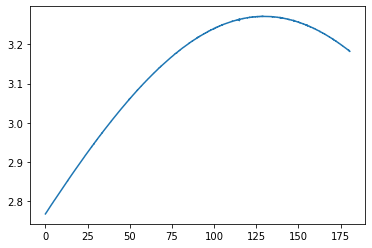

           2
7.949e-06 x - 0.002061 x + 0.8685
11


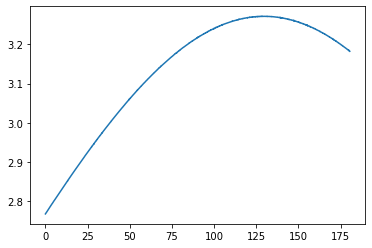

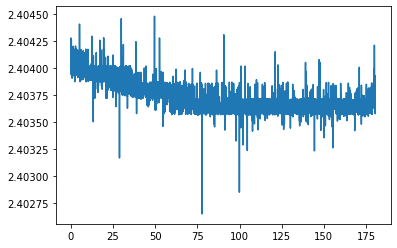

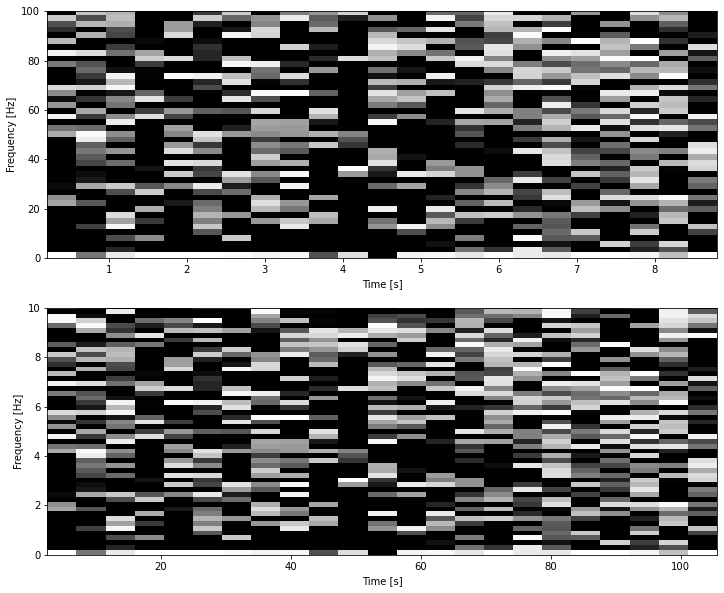

In [36]:
#30000
genthePlots(returnData('https://raw.githubusercontent.com/AmeVel2040/myPiFiles/main/LSStuffAmeya/23-06-22at12-34PM'),0,-1,600,50,16,2,256,256)

(5769,)
(5769,)


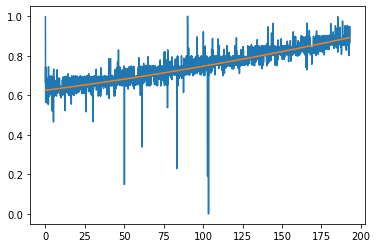

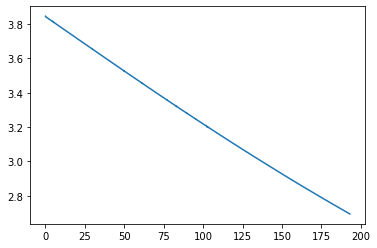

           2
1.795e-06 x + 0.001035 x + 0.6255
0


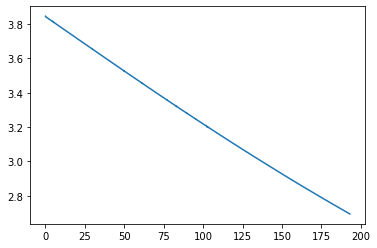

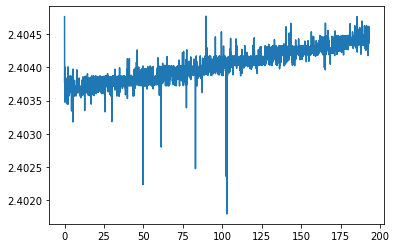

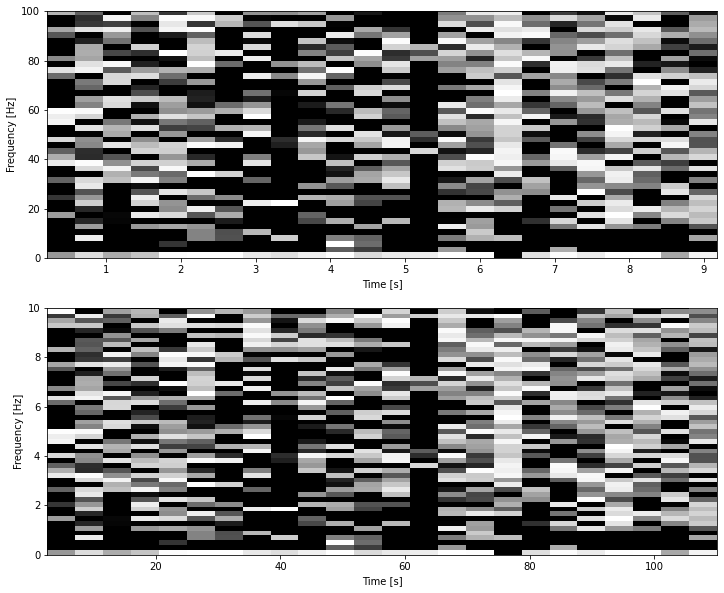

In [37]:
#15000
genthePlots(returnData('https://raw.githubusercontent.com/AmeVel2040/myPiFiles/main/LSStuffAmeya/23-06-22at12-38PM'),0,-1,600,50,16,2,256,256)

(5750,)
(5750,)


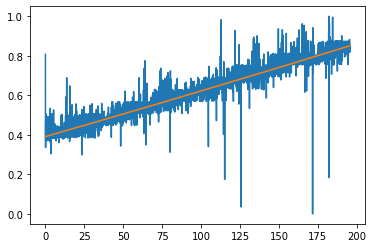

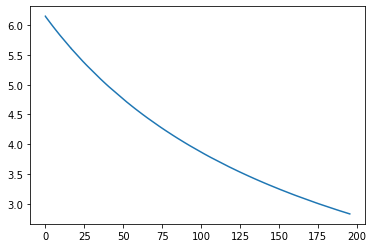

           2
4.279e-07 x + 0.002266 x + 0.3911
0


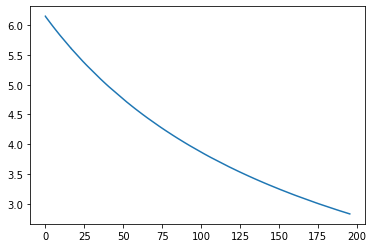

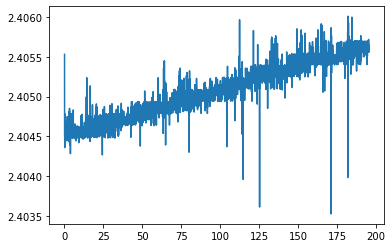

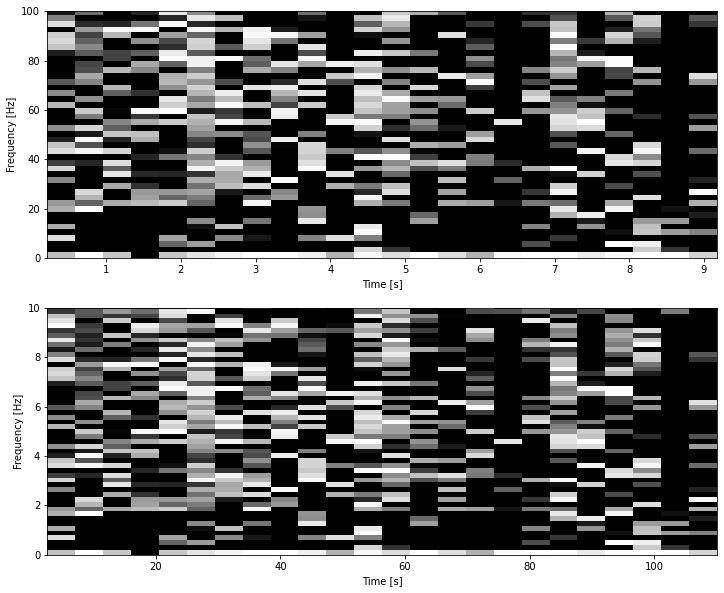

In [38]:
#7500
genthePlots(returnData('https://raw.githubusercontent.com/AmeVel2040/myPiFiles/main/LSStuffAmeya/23-06-22at12-41PM'),0,-1,600,50,16,2,256,256)

(5532,)
(5532,)


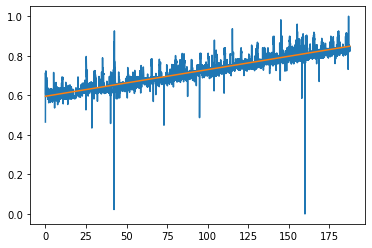

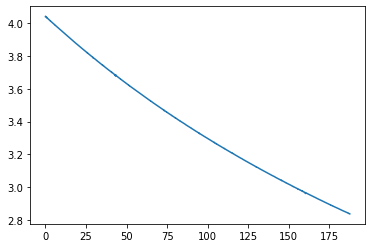

           2
3.208e-08 x + 0.001344 x + 0.5952
0


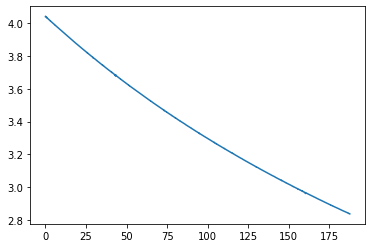

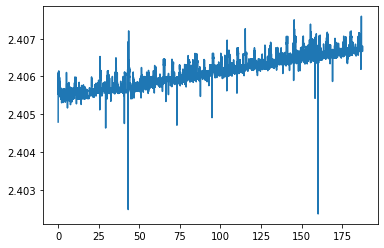

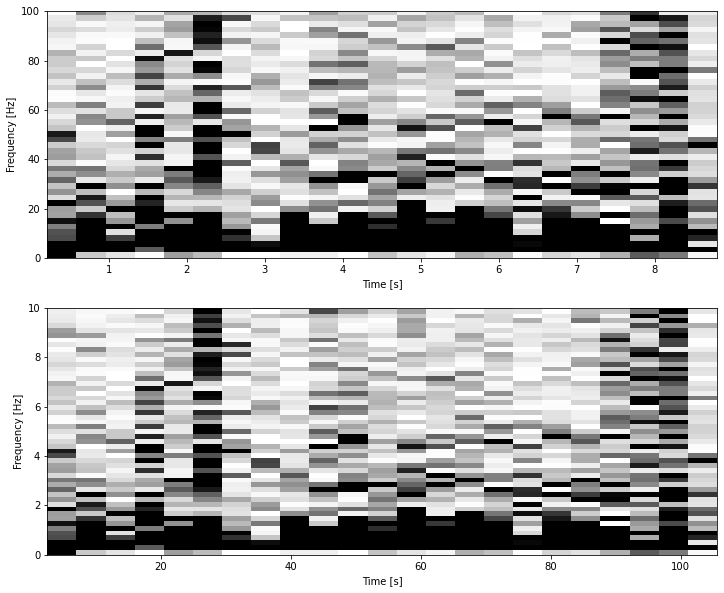

In [39]:
#2000
genthePlots(returnData('https://raw.githubusercontent.com/AmeVel2040/myPiFiles/main/LSStuffAmeya/23-06-22at12-45PM'),0,-1,600,50,16,2,256,256)

(4766,)
(4766,)


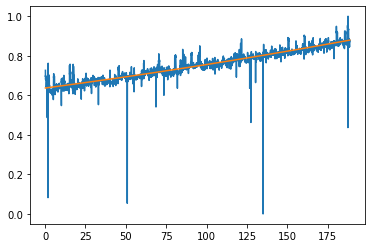

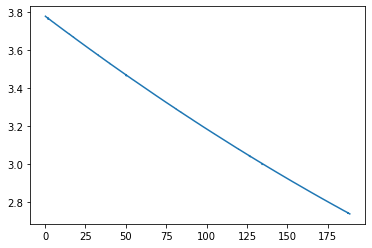

           2
1.088e-06 x + 0.00108 x + 0.6368
0


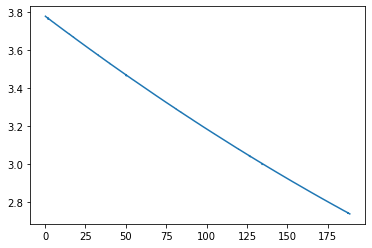

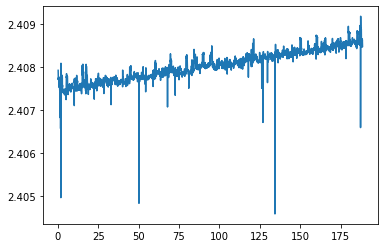

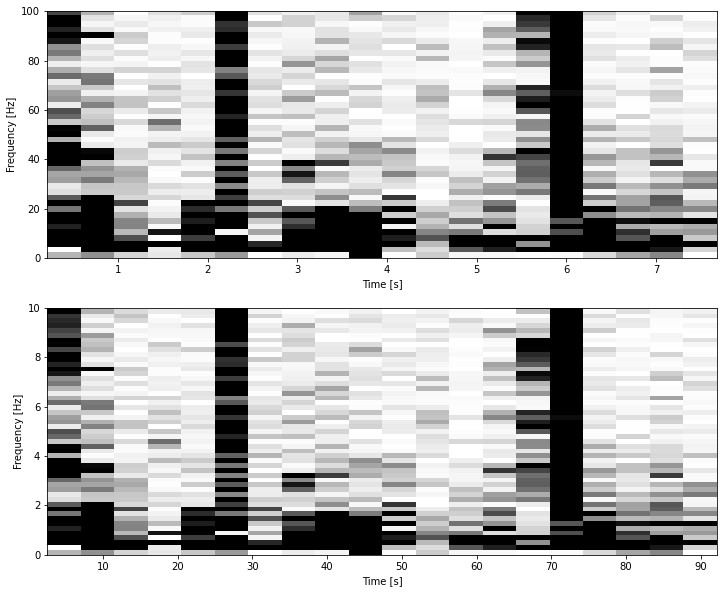

In [40]:
#500
genthePlots(returnData('https://raw.githubusercontent.com/AmeVel2040/myPiFiles/main/LSStuffAmeya/23-06-22at12-48PM'),5,-1,600,50,16,2,256,256)

(2004,)
(2004,)


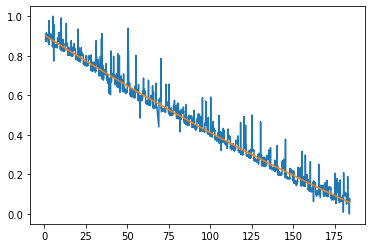

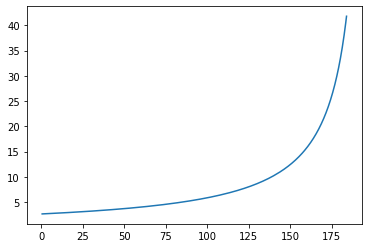

           2
3.937e-06 x - 0.005325 x + 0.9042
2


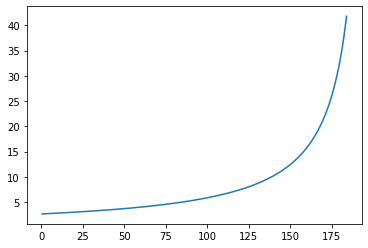

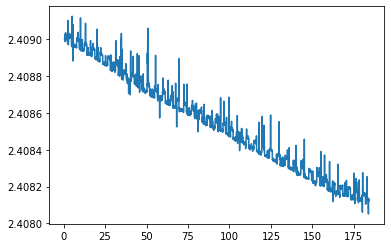

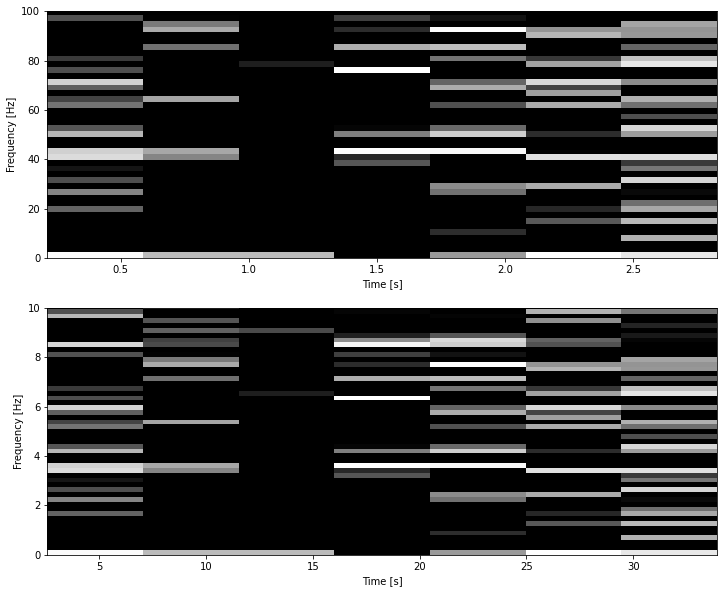

In [41]:
#60
genthePlots(returnData('https://raw.githubusercontent.com/AmeVel2040/myPiFiles/main/LSStuffAmeya/23-06-22at12-52PM'),5,-1,600,50,16,2,256,256)